In [81]:
%pylab inline
#import matplotlib as plt
#import numpy as np
import pandas as pd
import uncertainties
from uncertainties import unumpy as unp
from uncertainties import ufloat

def gaussian(x, mu, sigma, B, A):
    return A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, B, A: A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B,
                  p0=p0)

def line(x,a,b):
    return a * x + b

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)


def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)


def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path+".TKA", 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

def LRmG(x: list , y: list, u: list) -> list:
    """Linear Regression, weighted.
    
    """
    try:
        u[0]
        if (len(x) != len(y)):
            raise LenError
        if (len(x) != len(u)):
            raise LenError
        x = array(x)
        y = array(y)
        u = array(u)
        g = []
        for i in range(len(y)):
            g.append(1 / u[i] ** 2)

        a = (sum(g * (x ** 2)) * sum(g * y) - sum(g * x) * sum(g * x * y)) / (
                    sum(g) * sum(g * (x ** 2)) - (sum(g * x) ** 2))

        b = (sum(g) * sum(g * x * y) - sum(g * x) * sum(g * y)) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2)

        ua = sqrt(sum(g * x ** 2) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2))

        ub = sqrt(sum(g) / (sum(g) * sum(g * x ** 2) - sum(g * x) ** 2))

        return a, b, ua, ub

    except TypeError:
        return LRmG(x, y, ones(len(y)) * u)

    

def vertrag(x, ux, y):
    """determines, whether your value is compatible with a given value"""
    return abs(x - y) / ux


Populating the interactive namespace from numpy and matplotlib


In [48]:
calibr = array([
    array([  # ch
        183,
        180,
        177,
        173,
        166,
        153,
        139,
        126,
        112,
        99,
        98,
        85,
        71,
        58,
        54,
        51,
        48,
        44,
        41,
        38,
        35,
        32,
        30,
        28,
        28,
        27,
        27,
        27
    ]),array([  # t
        190.5,
        186.5,
        182.5,
        178.5,
        170.5,
        154.5,
        132.5,
        122.5,
        106.5,
        90.5,
        90,
        74,
        58,
        42,
        38,
        34,
        30,
        26,
        22,
        18,
        14,
        10,
        6,
        2,
        1.5,
        1,
        0.5,
        0
    ])+3*2.5
])

In [49]:
[slope,offset], R_2=linfit_pm(*calibr)
data_raw = read("Hauptmessung")
data = [data_raw[0],[],[]]
#fehler: sqrt(n)
for i in range(len(data_raw[1])):
    data[1].append(data_raw[1][i])
    data[2].append(np.sqrt(data_raw[1][i]))
len(data[1])
data[0]=(data[0]-offset)/slope

In [50]:
len(data[0])

510

In [51]:
#ignore zeros and initial peak
start,stop = 32,510-42

#log transform
x = val(data[0][start:stop])
y = array(data[1][start:stop])
y_log = log(array(data[1][start:stop]))
lin_err = array(data[2][start:stop])
#get assymetric errs
upper = log(y + lin_err) - y_log
lower = y_log - log(y - lin_err)
errprop = lin_err/y

In [52]:
len(x)==len(x)==len(y_log)==len(lin_err)==len(upper)==len(lower)==len(errprop)

True

In [53]:
stop

468

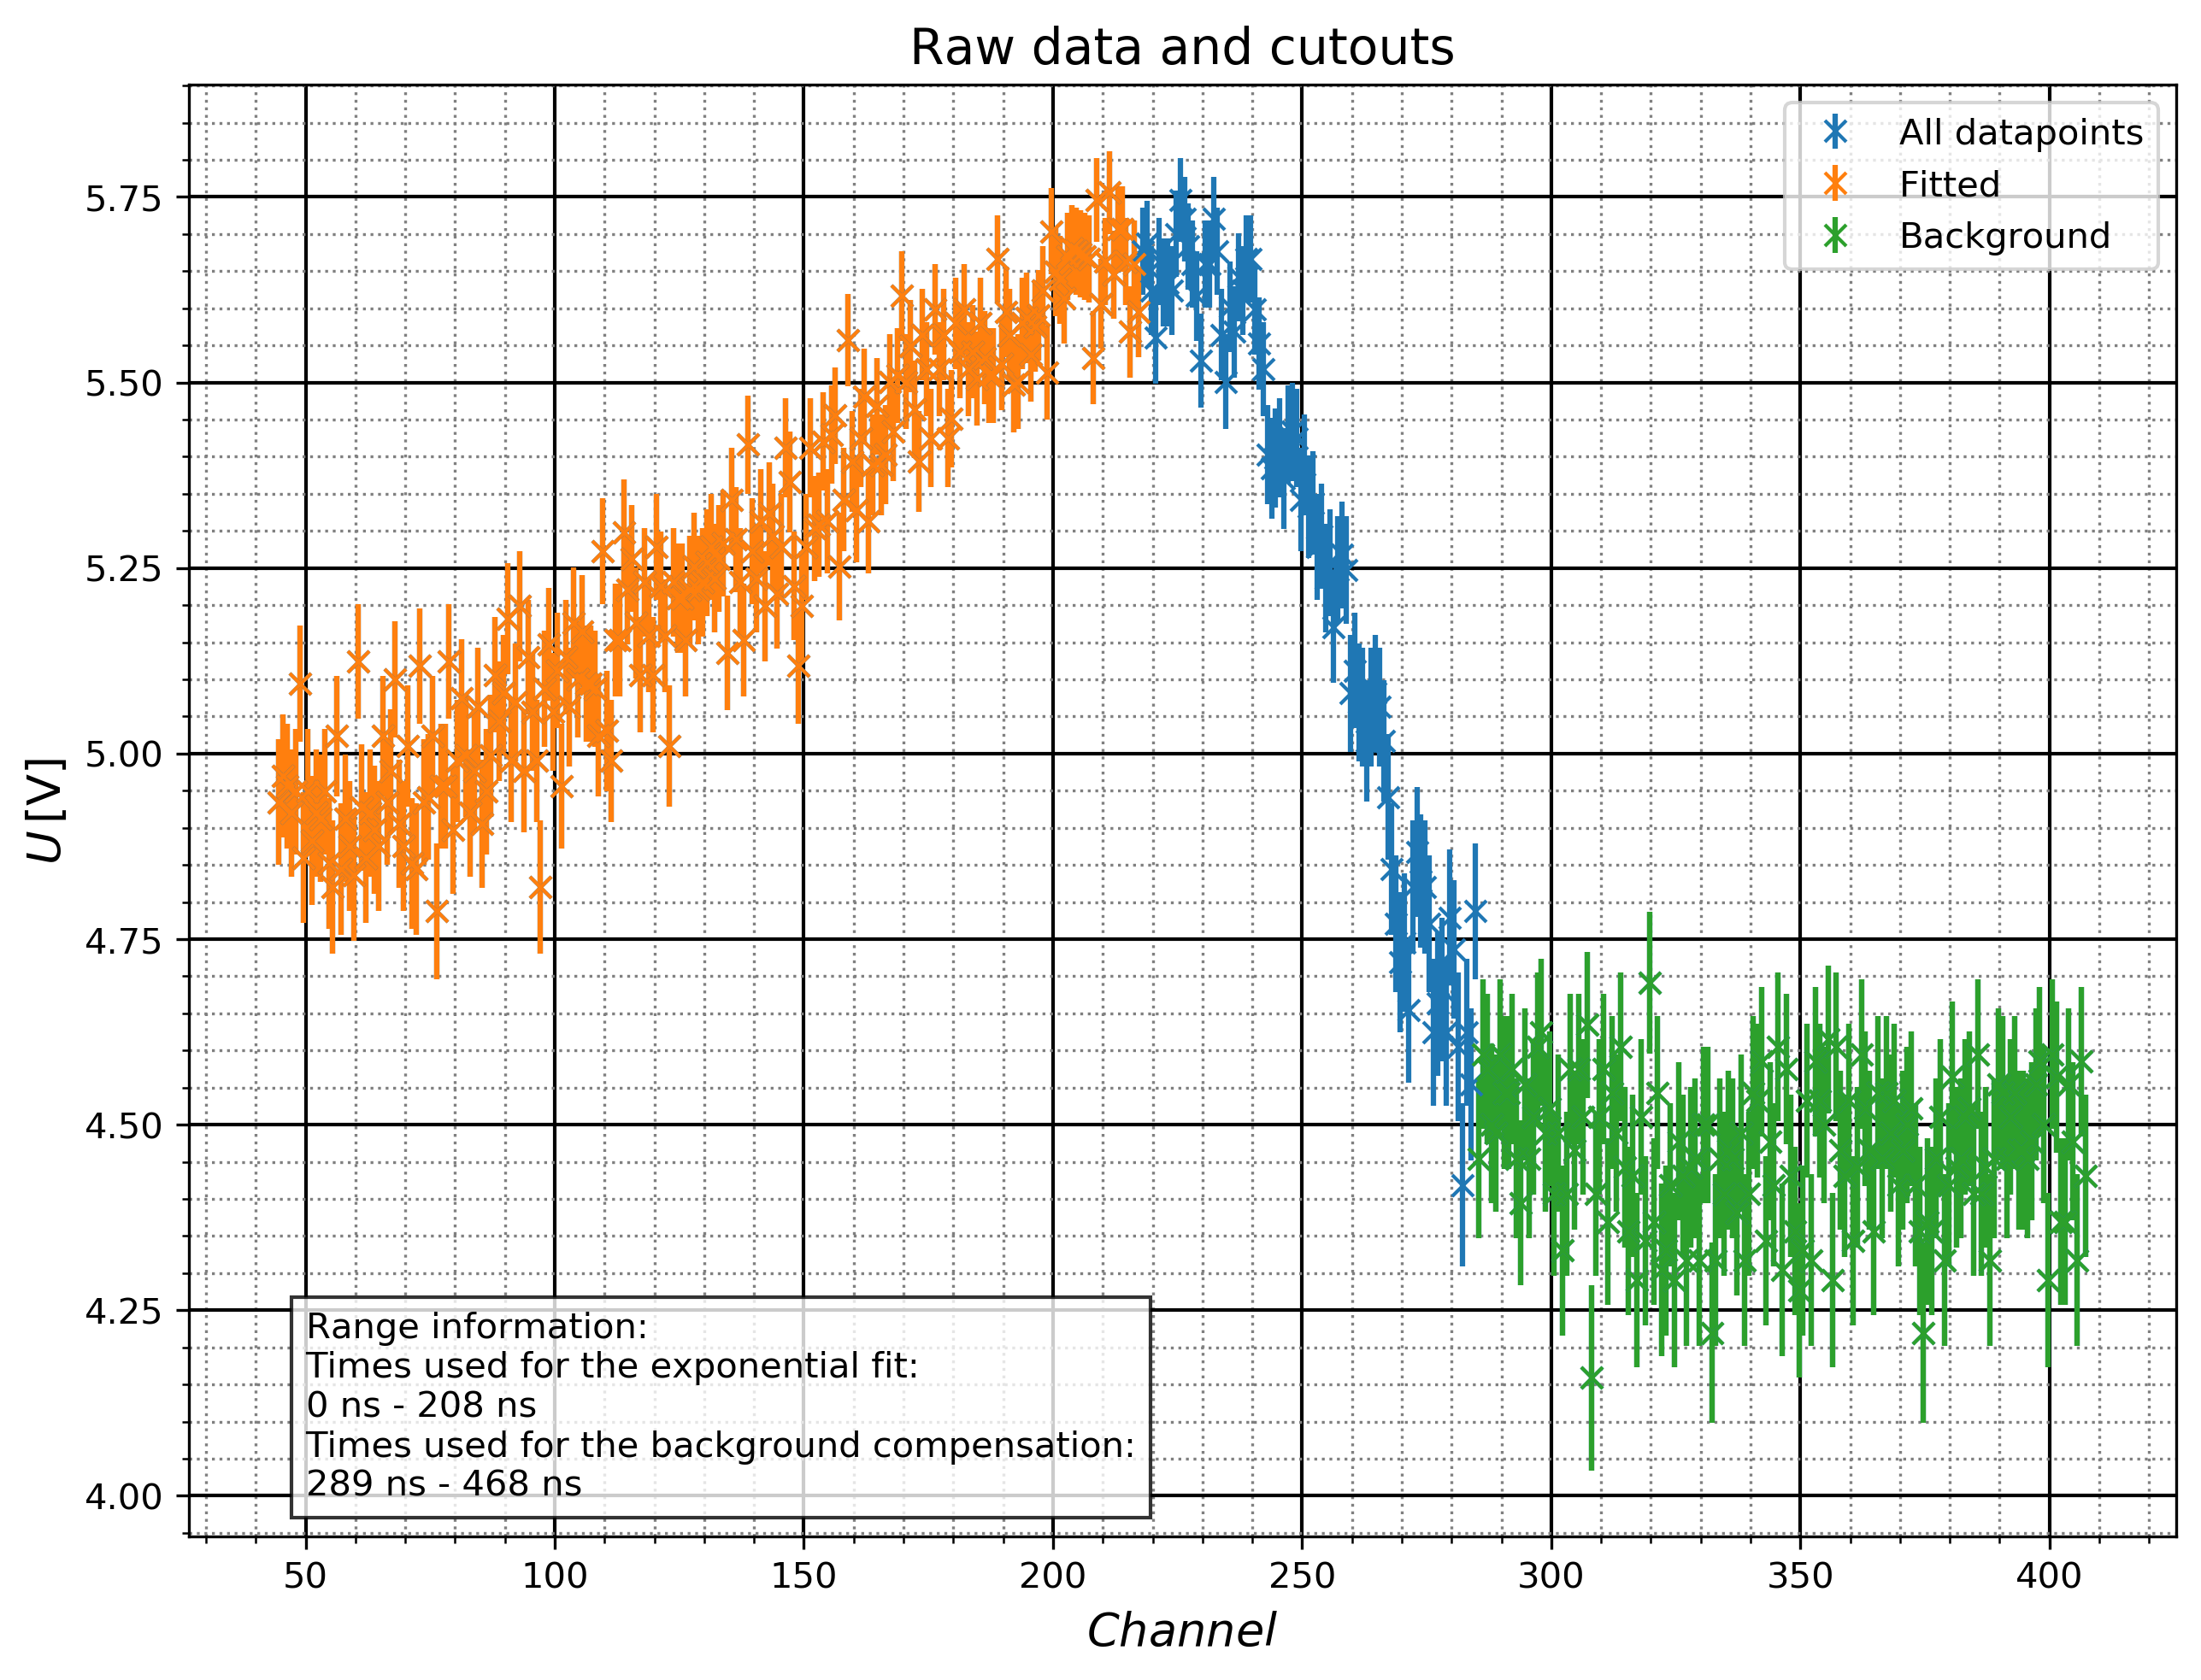

In [54]:
beginning, end = 32,468
start,stop = 0,abs(260-end)
start2,stop2 = 321-beginning,end

from uncertainties import unumpy as unp
x_line=np.linspace(-20,200)
y_line=x*slope+offset



#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.figure(dpi=300)





### Plots
plt.errorbar(x,y_log,yerr=errprop,fmt="x",label="All datapoints")
plt.errorbar(x[start:stop],y_log[start:stop],yerr=errprop[start:stop],fmt="x",label="Fitted")
plt.errorbar(x[start2:stop2],y_log[start2:stop2],yerr=errprop[start2:stop2],fmt="x",label="Background")
plt.text(50, 4,'Range information:\nTimes used for the exponential fit:\n{:} ns - {:} ns \nTimes used for the background compensation:\n{:} ns - {:} ns '.format(start,stop,start2,stop2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=10)

###   Label / Title

plt.title(r'Raw data and cutouts',fontsize=14)
plt.ylabel(r'Counts',fontsize=13)
plt.xlabel(r'Time Delay $\Delta t$ [ns]',fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.savefig("data_log_corrected.png")
plt.show()

In [68]:
x_bkg = x[start2:stop2]
y_bkg = y_log[start2:stop2]

[slope2,offset2],R_2_2 = linfit_pm(x_bkg,y_bkg)
offset3 = mean(y_bkg)
print("mean")
print(offset3)
print("fit")
print(slope2)
print(offset2)
print(R_2_2)
#offset2=offset3

mean
4.461143198396208
fit
-0.00016+/-0.00023
4.52+/-0.08
0.003198293986434897


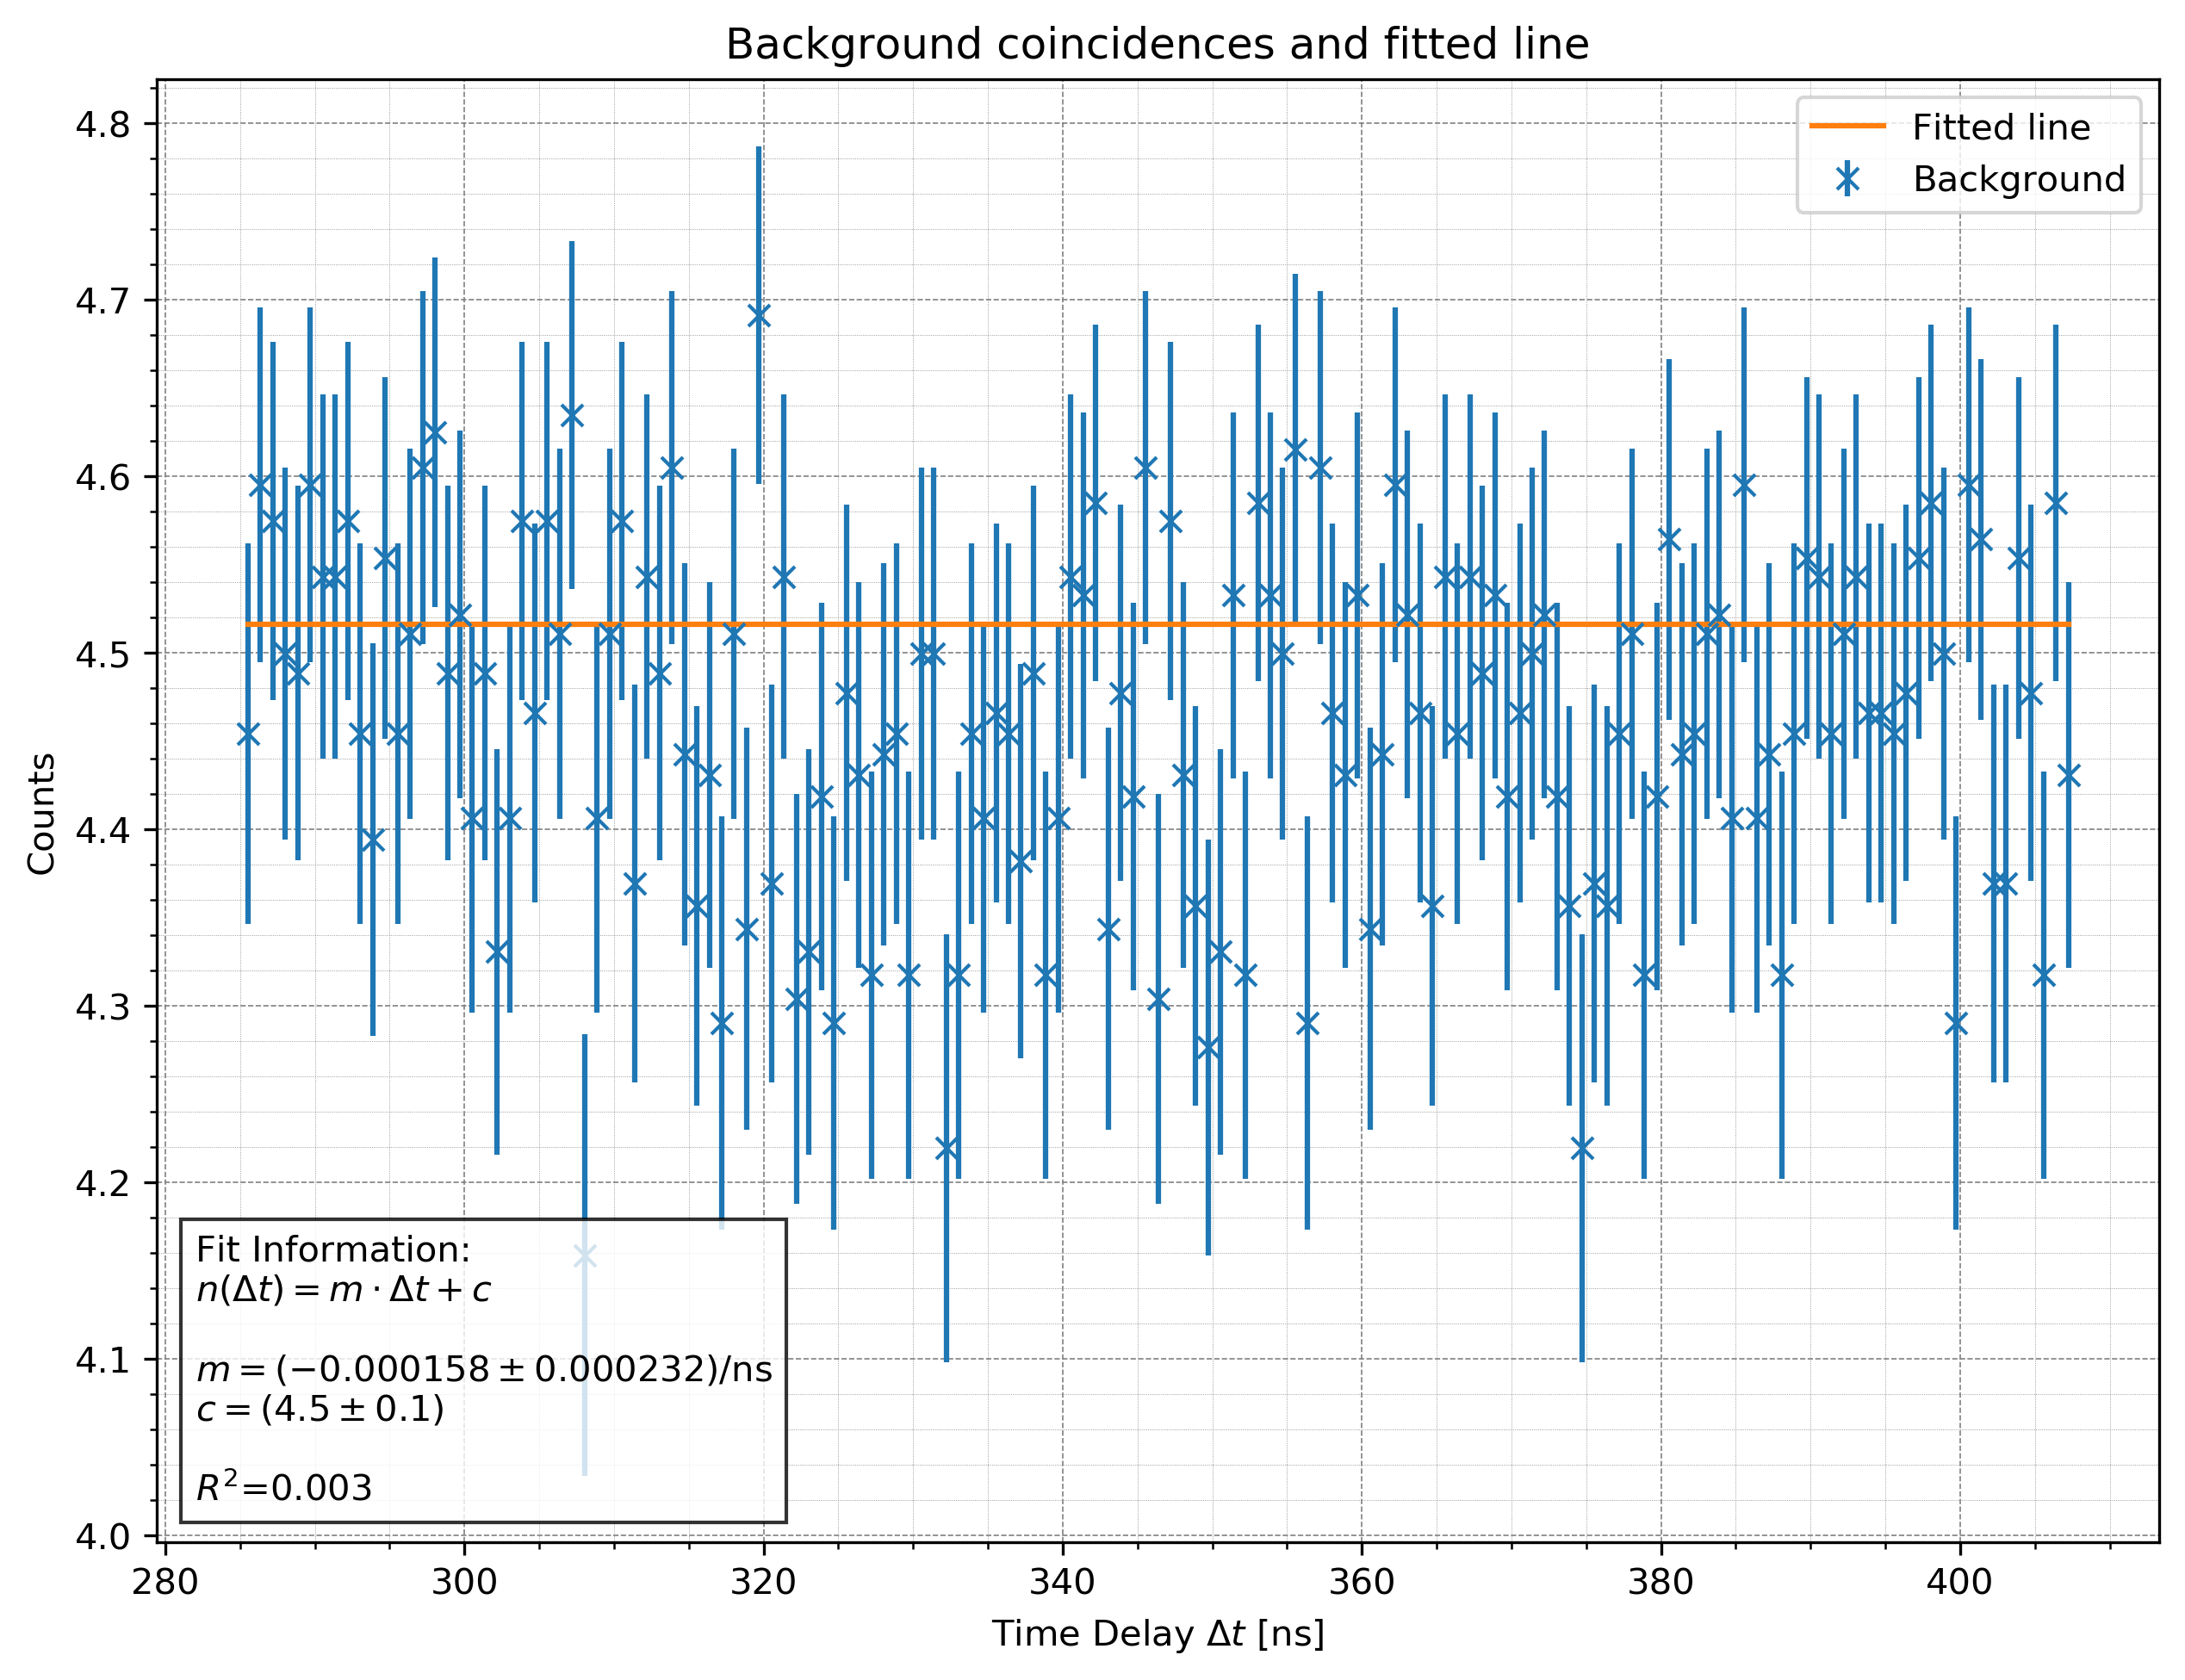

In [74]:
from uncertainties import unumpy as unp

plt.figure(dpi=300)
plt.title(r'Background coincidences and fitted line')
plt.ylabel(r'Counts')
plt.xlabel(r'Time Delay $\Delta t$ [ns]')

#plt.plot(val(data[0]),val(data[1]),"x",label="All datapoints")
#plt.plot(val(data[0][start:stop]),val(data[1][start:stop]),"x",label="Fitted")
plt.errorbar(x[start2:stop2],y_log[start2:stop2],fmt="x",label="Background",yerr=errprop[start2:stop2])
plt.plot(val(x[start2:stop2]),
         val(np.ones(len(x[start2:stop2]))*offset2),label="Fitted line")

plt.grid(which='major',linestyle='--', color='grey',linewidth=0.4)
plt.grid(which='minor',linestyle=':', color='grey',linewidth=0.2)
plt.minorticks_on()

plt.legend()
plt.text(282,4.02,
         'Fit Information:\n$n(\\Delta t)=m\\cdot \\Delta t +c $\n\n$m=({:.6f}\\pm {:.6f})$/ns\n$c=({:.1f}\\pm {:.1f})$\n\n$R^2$={:.3f}'
         .format(val(slope2),err(slope2),val(offset2),err(offset2),R_2_2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=10)
plt.savefig("lin_bkgnd_corrected.png")
plt.show()

In [75]:
#background subtraction
y_log -= val(offset2)


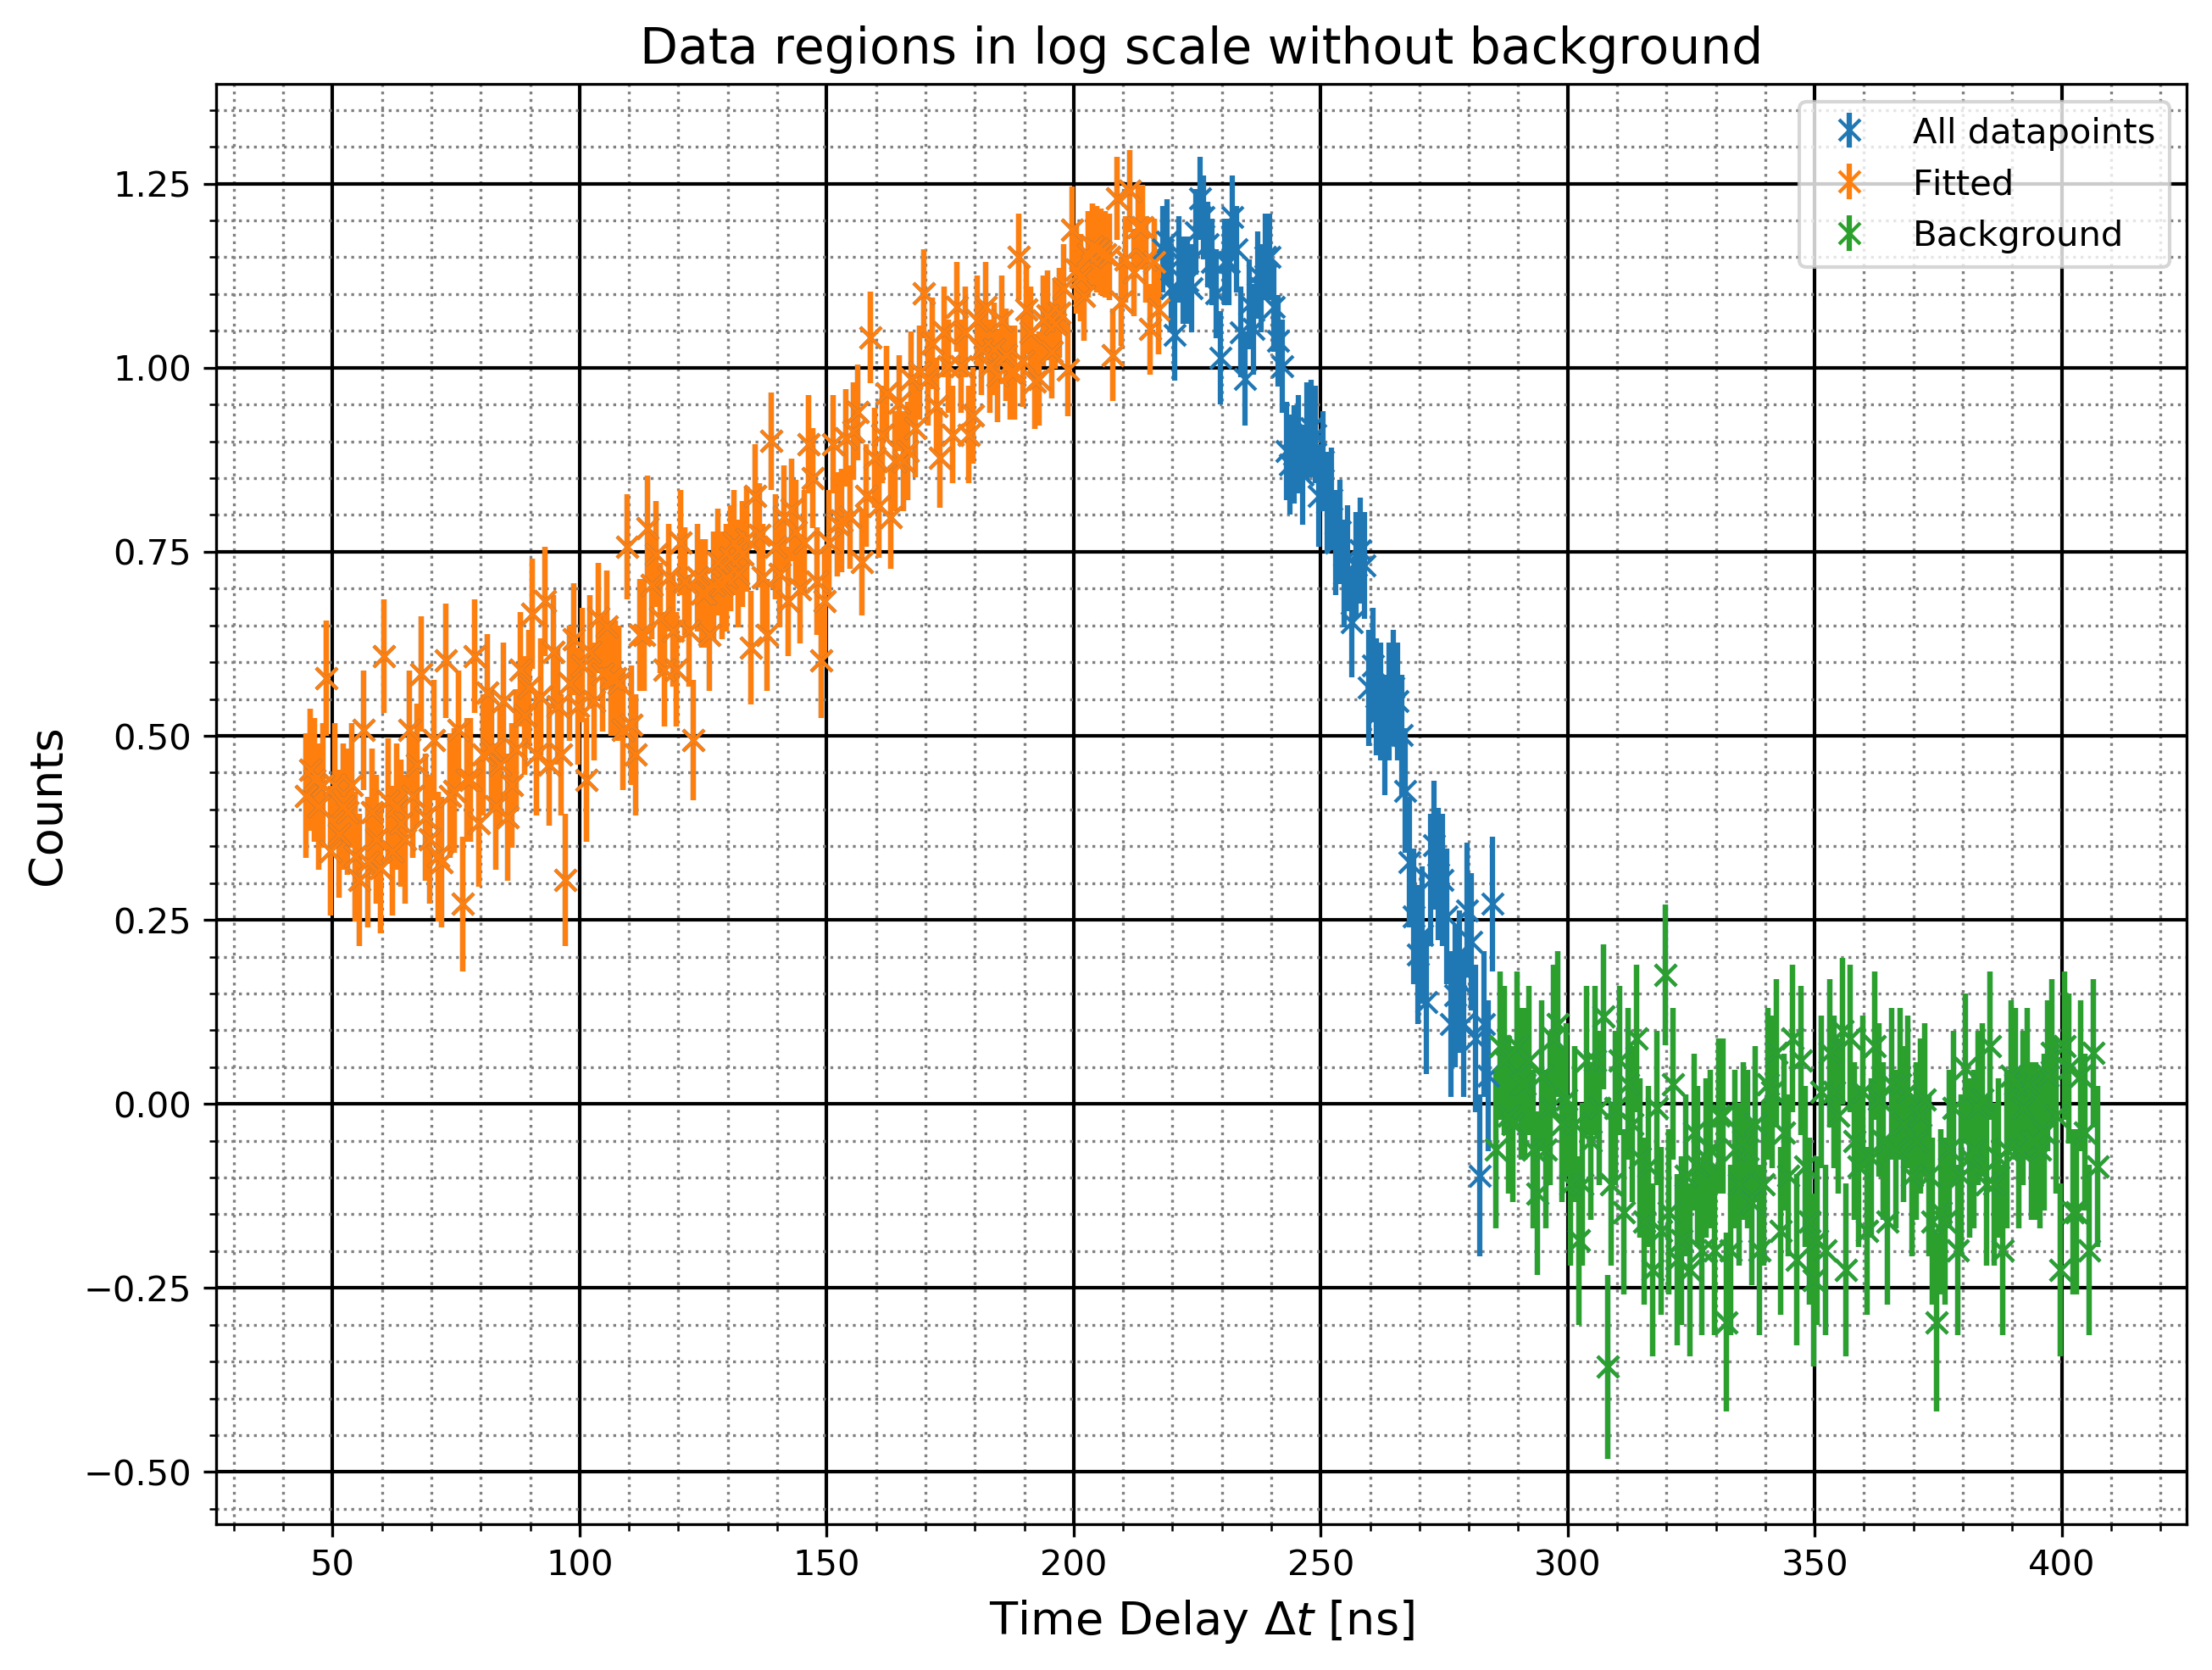

In [84]:
from uncertainties import unumpy as unp

plt.figure(dpi=300)


#plt.plot(val(data[0]),val(data[1]),"x",label="All datapoints")
#plt.plot(val(data[0][start:stop]),val(data[1][start:stop]),"x",label="Fitted")
plt.errorbar(x,y_log,yerr=errprop,fmt="x",label="All datapoints")
plt.errorbar(x[start:stop],y_log[start:stop],yerr=errprop[start:stop],fmt="x",label="Fitted")
plt.errorbar(x[start2:stop2],y_log[start2:stop2],yerr=errprop[start2:stop2],fmt="x",label="Background")

###   Label / Title

plt.title(r'Data regions in log scale without background',fontsize=14)
plt.ylabel(r'Counts',fontsize=13)
plt.xlabel(r'Time Delay $\Delta t$ [ns]',fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.text(282,4.02,
#         'Fit Information:\n$n(\\Delta t)=m\\cdot \\Delta t +c $\n\n$m=({:.6f}\\pm {:.6f})$/ns\n$c=({:.1f}\\pm {:.1f})$\n\n$R^2$={:.3f}'
#         .format(val(slope2),err(slope2),val(offset2),err(offset2),R_2_2), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=10)
plt.savefig("log_nobkg_corrected.png")
plt.show()

In [83]:
a,b,ua,ub = LRmG(x[start:stop],y_log[start:stop],errprop[start:stop])

bb=uncertainties.ufloat(a,ua)
aa=uncertainties.ufloat(b,ub)

print("slope_log",b,aa)
print("offset_log",a,bb)
mlt_log = 1/b
print(mlt_log)

print("T_1/2",(np.log(2)*mlt_log))
print("T_1/2_err",(np.log(2)/(b**2))*ub)
print(uncertainties.ufloat((np.log(2)*mlt_log),(np.log(2)/(b**2))*ub))
vertrag(numpy.log(2) * mlt_log,(np.log(2)/(b**2))*ub,98)

slope_log 0.0049782708422371575 0.00498+/-0.00010
offset_log 0.09285838959606359 0.093+/-0.015
200.87296004783371
T_1/2 139.23452590788648
T_1/2_err 2.783647351082679
139.2+/-2.8


14.8131284991429

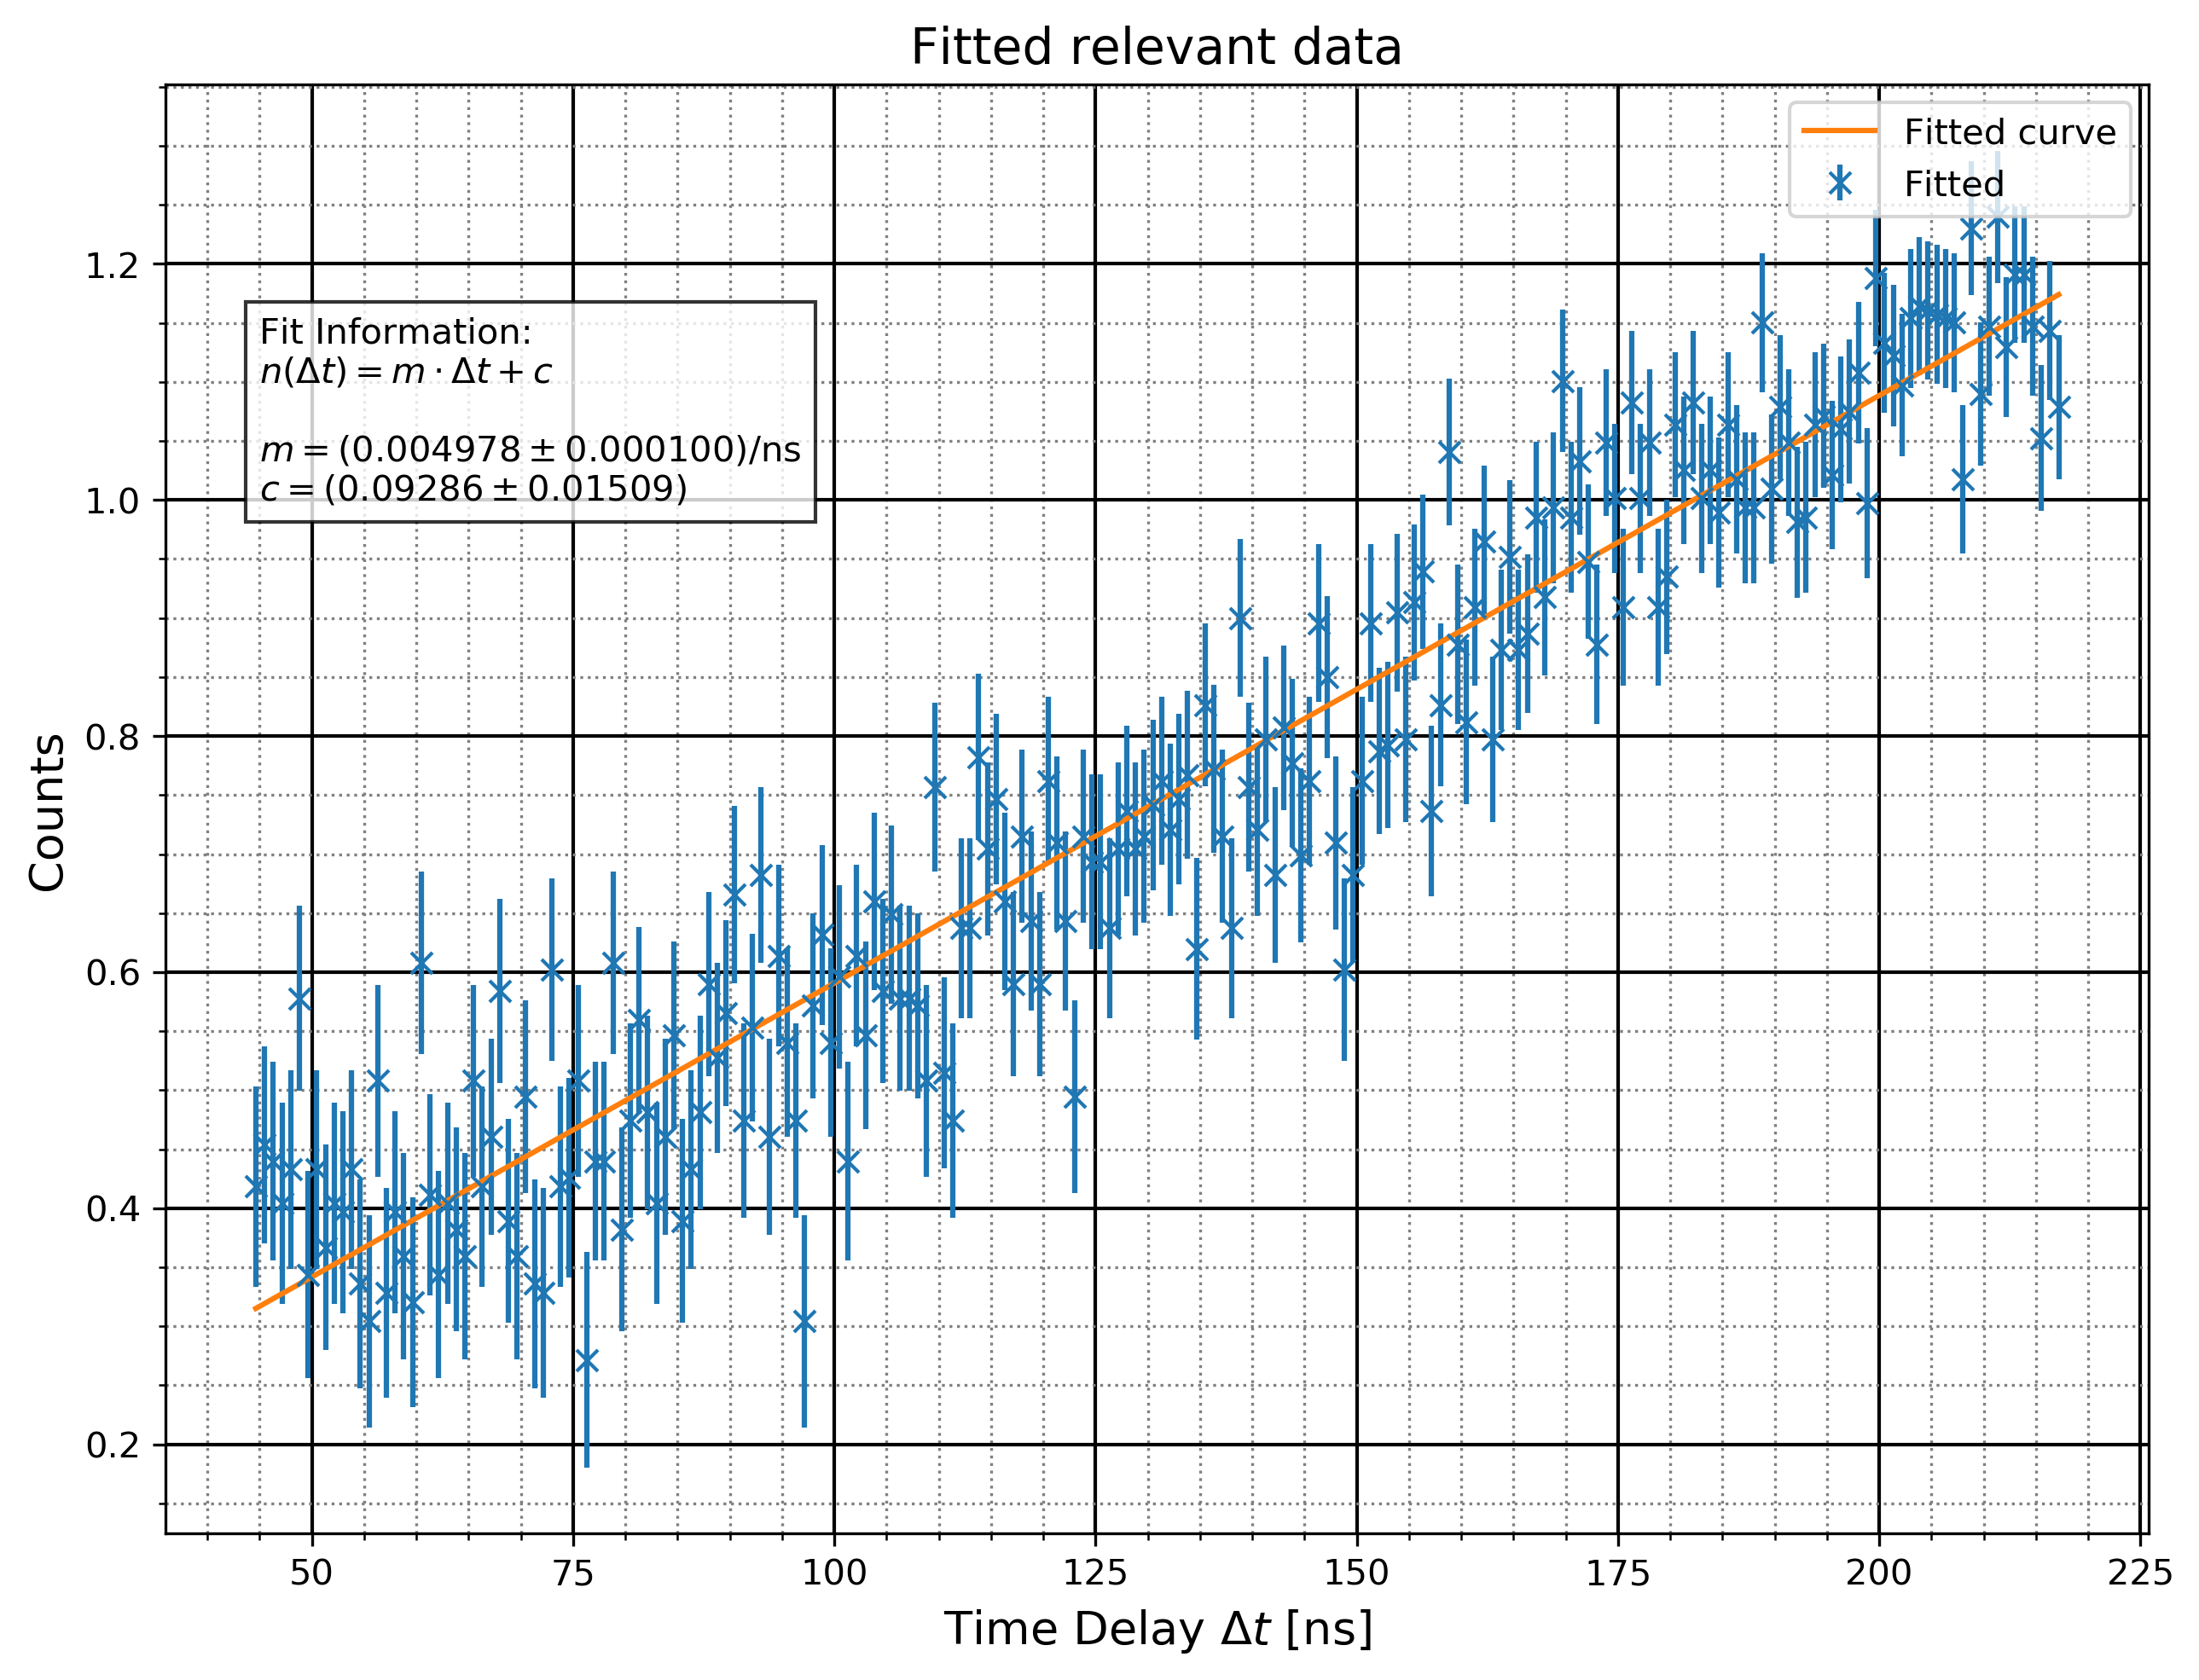

In [91]:
plt.figure(dpi=300)


#plt.plot(val(data[0]),val(data[1]),"x",label="All datapoints")
#plt.plot(val(data[0][start:stop]),val(data[1][start:stop]),"x",label="Fitted")
#plt.errorbar(x,y_log,yerr=errprop,fmt="x",label="All datapoints")
plt.errorbar(x[start:stop],y_log[start:stop],yerr=errprop[start:stop],fmt="x",label="Fitted")
#plt.errorbar(x[start2:stop2],y_log[start2:stop2],yerr=errprop[start2:stop2],fmt="x",label="Background")

plt.plot((x[start:stop]),(line(x[start:stop],b, a)),label="Fitted curve")
#plt.errorbar(val(data_log_clean[0][start:stop]),val(data_log_clean[1][start:stop]),err(data_log_clean[1][start:stop]),fmt=" ",elinewidth=0.2,capsize=2, label='Relevant Data',errorevery=10)


###   Label / Title

plt.title(r'Fitted relevant data',fontsize=14)
plt.ylabel(r'Counts',fontsize=13)
plt.xlabel(r'Time Delay $\Delta t$ [ns]',fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
plt.text(45,1,
         'Fit Information:\n$n(\\Delta t)=m\\cdot \\Delta t +c $\n\n$m=({:.6f}\\pm {:.6f})$/ns\n$c=({:.5f}\\pm {:.5f})$'
         .format(b,ub,a,ua), bbox={'facecolor':'white', 'alpha':0.8}, fontsize=10)
plt.savefig("log_end_corrected.png")
plt.show()